# Data 1 - Curate

We remove the things that look like they might be artifacts to see if this change our results.

In [1]:
from human_hip import spike_data

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112723_hckcr1_21841_120323_base_acqm.zip" )

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from braingeneers.analysis.analysis import SpikeData

## Review Dataset

plot the spike raster

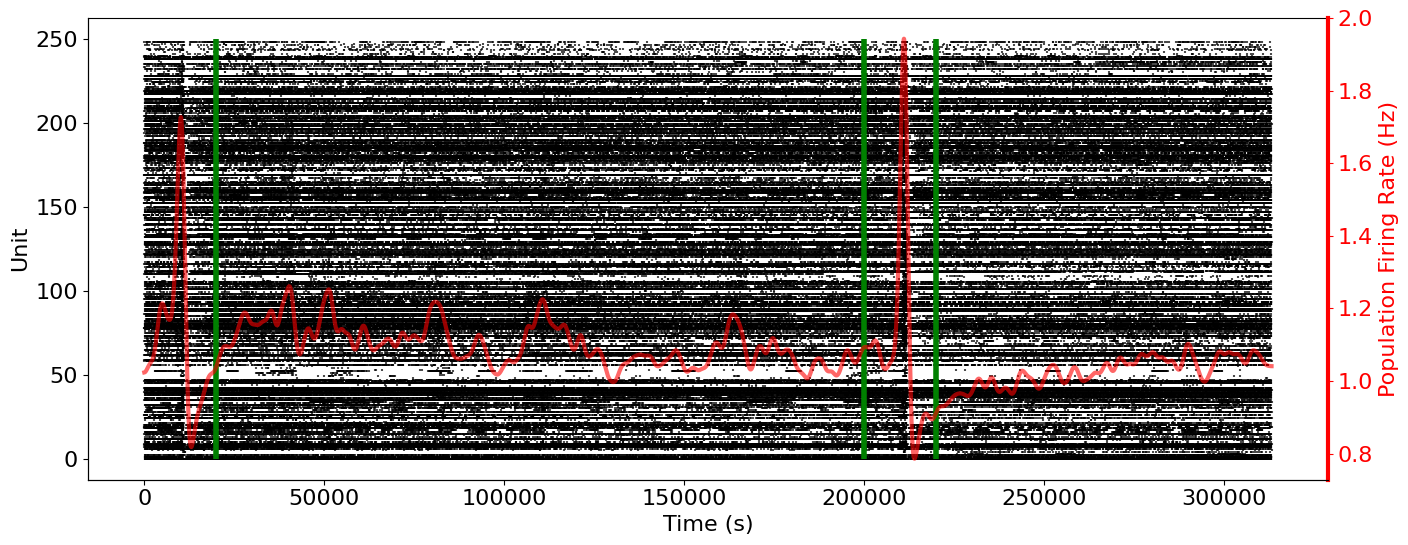

In [17]:
ax,ax1 = spike_data.plot_raster( sd )
ax.vlines( 20000, 0, 250, color='g', lw=4)
ax.vlines( 200000, 0, 250, color='g', lw=4 )
ax.vlines( 220000, 0, 250, color='g', lw=4 )


## Remove anomilies

get length of recording in ms

In [18]:
sd.length

313148.85

create sub-datasets and get their spike trains

In [29]:
sd_1 = sd.subtime(20000, 200000)
sd_2 = sd.subtime(220000, sd.length)

spike_train_1 = sd_1.train
spike_train_2 = sd_2.train
# Edit the spike trains so that the timing of spikes are correct
modified_spike_train_2 = [neuron_spike_times + 200000- 20000 for neuron_spike_times in spike_train_2] 

Combine spike trains into a singe train

In [30]:
def combine_multiple_spike_trains(spike_train_list):
    num_neurons = len(spike_train_list[0])
    num_spike_trains = len(spike_train_list)
    combined_spike_train = [np.array([]) for _ in range(num_neurons)]
    
    for neuron in range(num_neurons):
        combined_neuron = np.array([])  # Initialize an empty array for each neuron
        for i in range(num_spike_trains):
            combined_neuron = np.append(combined_neuron, spike_train_list[i][neuron])
        combined_spike_train[neuron] = combined_neuron
    
    return combined_spike_train

# Call the function to combine spike trains
combined_spike_train = combine_multiple_spike_trains([spike_train_1, modified_spike_train_2])
print("Combined Spike Train:", len(combined_spike_train[0]))

Combined Spike Train: 3557


Check info in spiketrain is correct

In [31]:
print(len(sd.train[0]))
len(combined_spike_train)

4097


249

turn spike train into a `spike_data` object

In [32]:
sd2 = SpikeData(combined_spike_train, length=(sd_1.length + sd_2.length), N=sd_1.N, 
                         metadata=sd_1.metadata, neuron_data=sd_1.neuron_data,
                         neuron_attributes=sd_1.neuron_attributes)

/tmp/ipykernel_26460/2592445974.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  metadata=sd_1.metadata, neuron_data=sd_1.neuron_data,


check that it looks ok

In [33]:
print(sd2.length)
print(sd.length)
print( (sd.length - sd2.length) / 1000, "seconds gone")

273148.85
313148.85
40.0 seconds gone


plot new spike_data

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

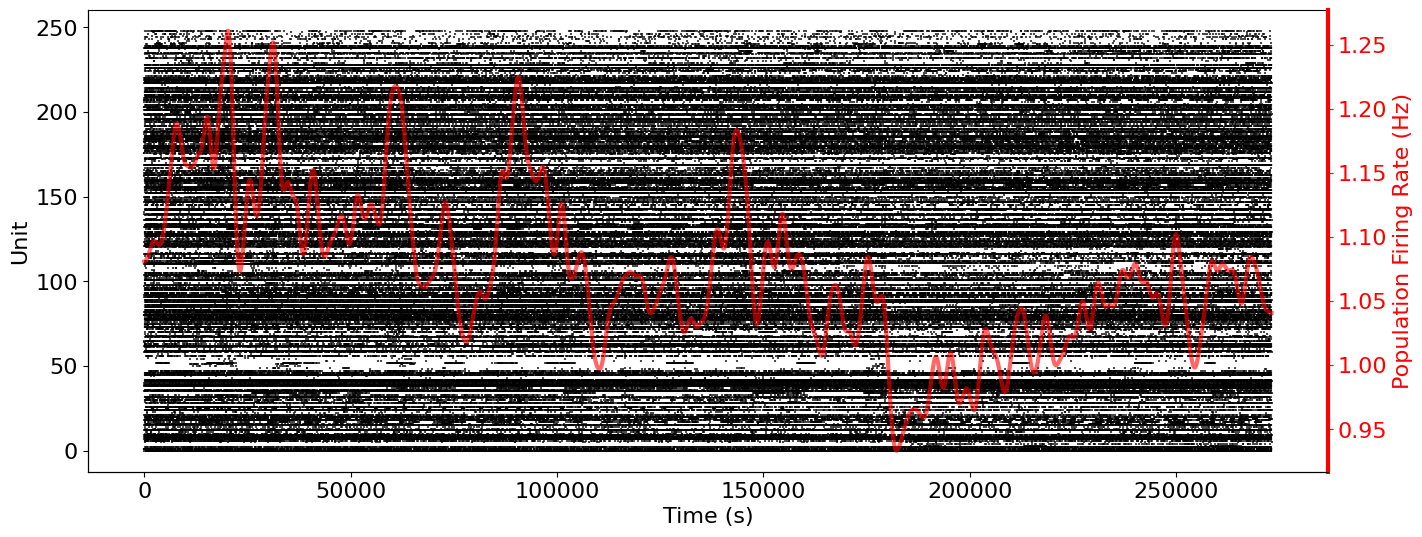

In [34]:
spike_data.plot_raster( sd2 )

## Save Dataset

save dataset

<font color="red"> This line is commented out to protect against overwriting data


In [35]:
# with open( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/curated_base_acqm.pkl" , 'wb') as filename:
#     pickle.dump(sd2, filename)

Load data

In [36]:
with open('/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/curated_base_acqm.pkl', 'rb') as filename:
    sd = pickle.load(filename)


# Resulting Plots

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

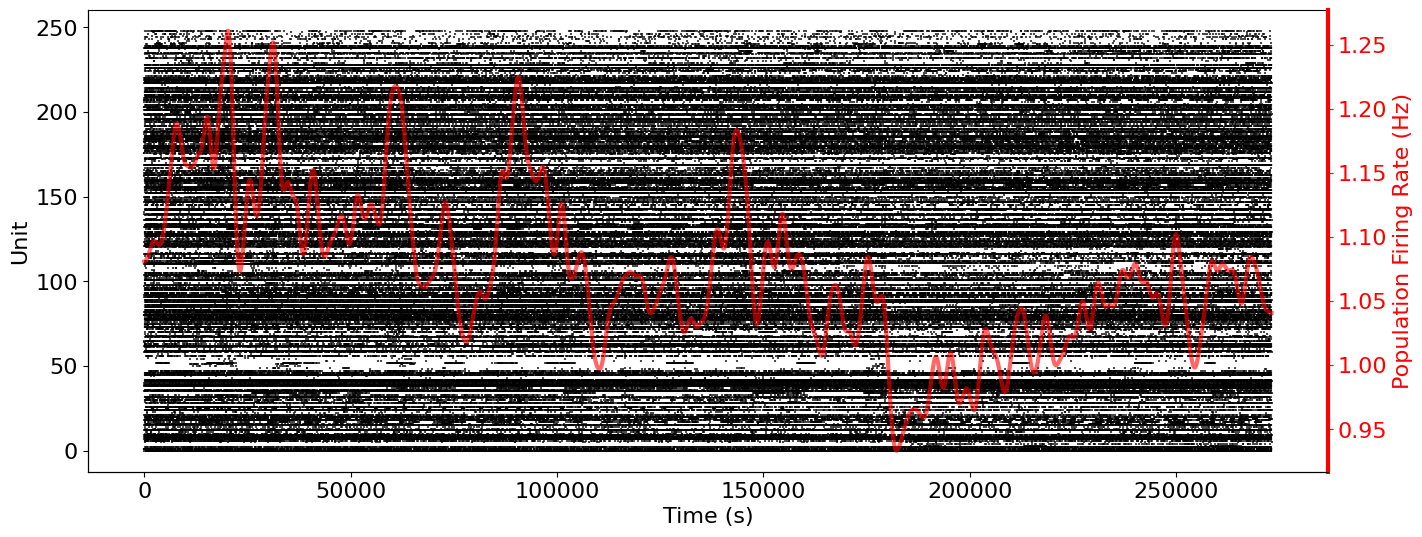

In [37]:
spike_data.plot_raster( sd )

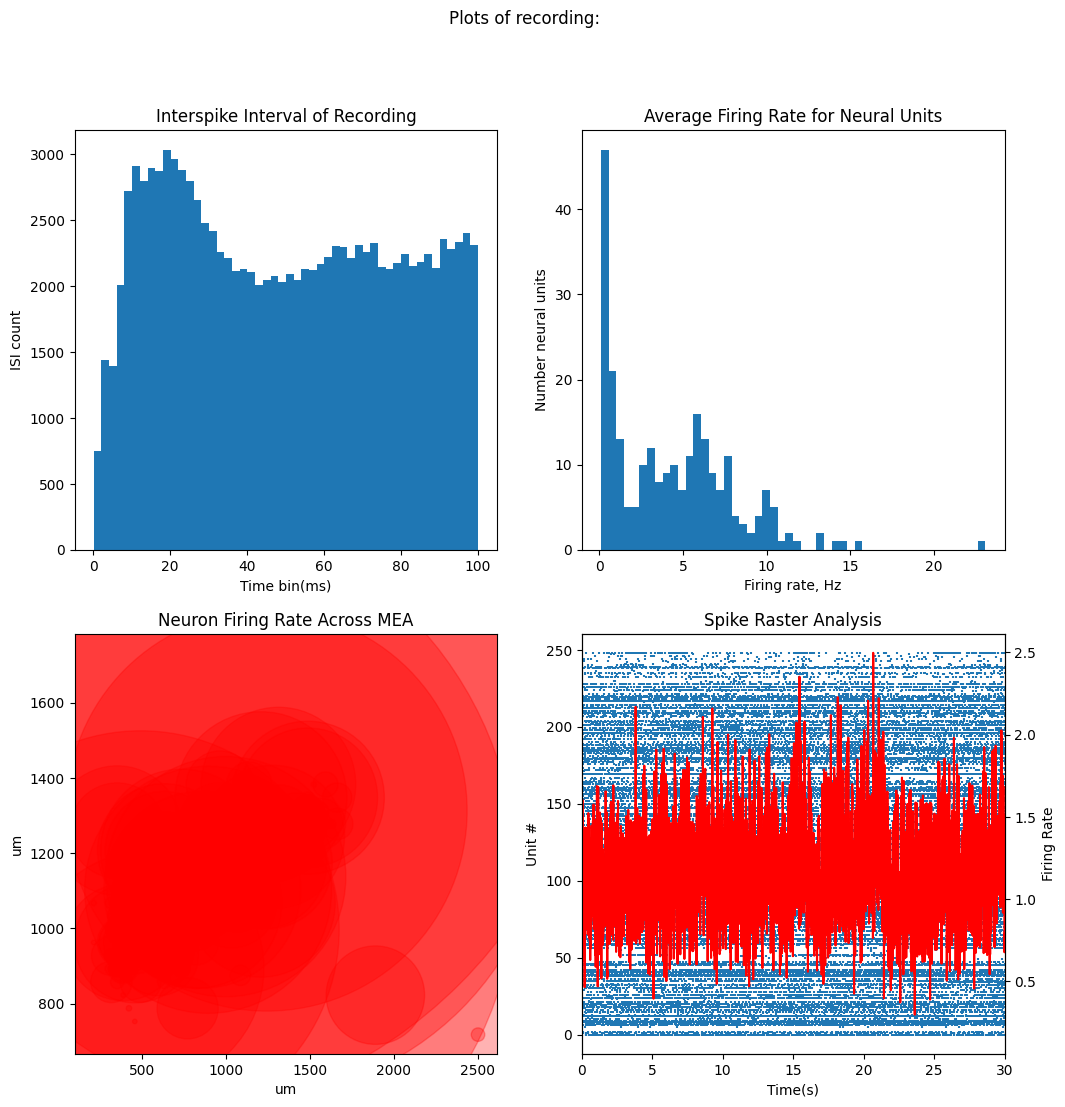

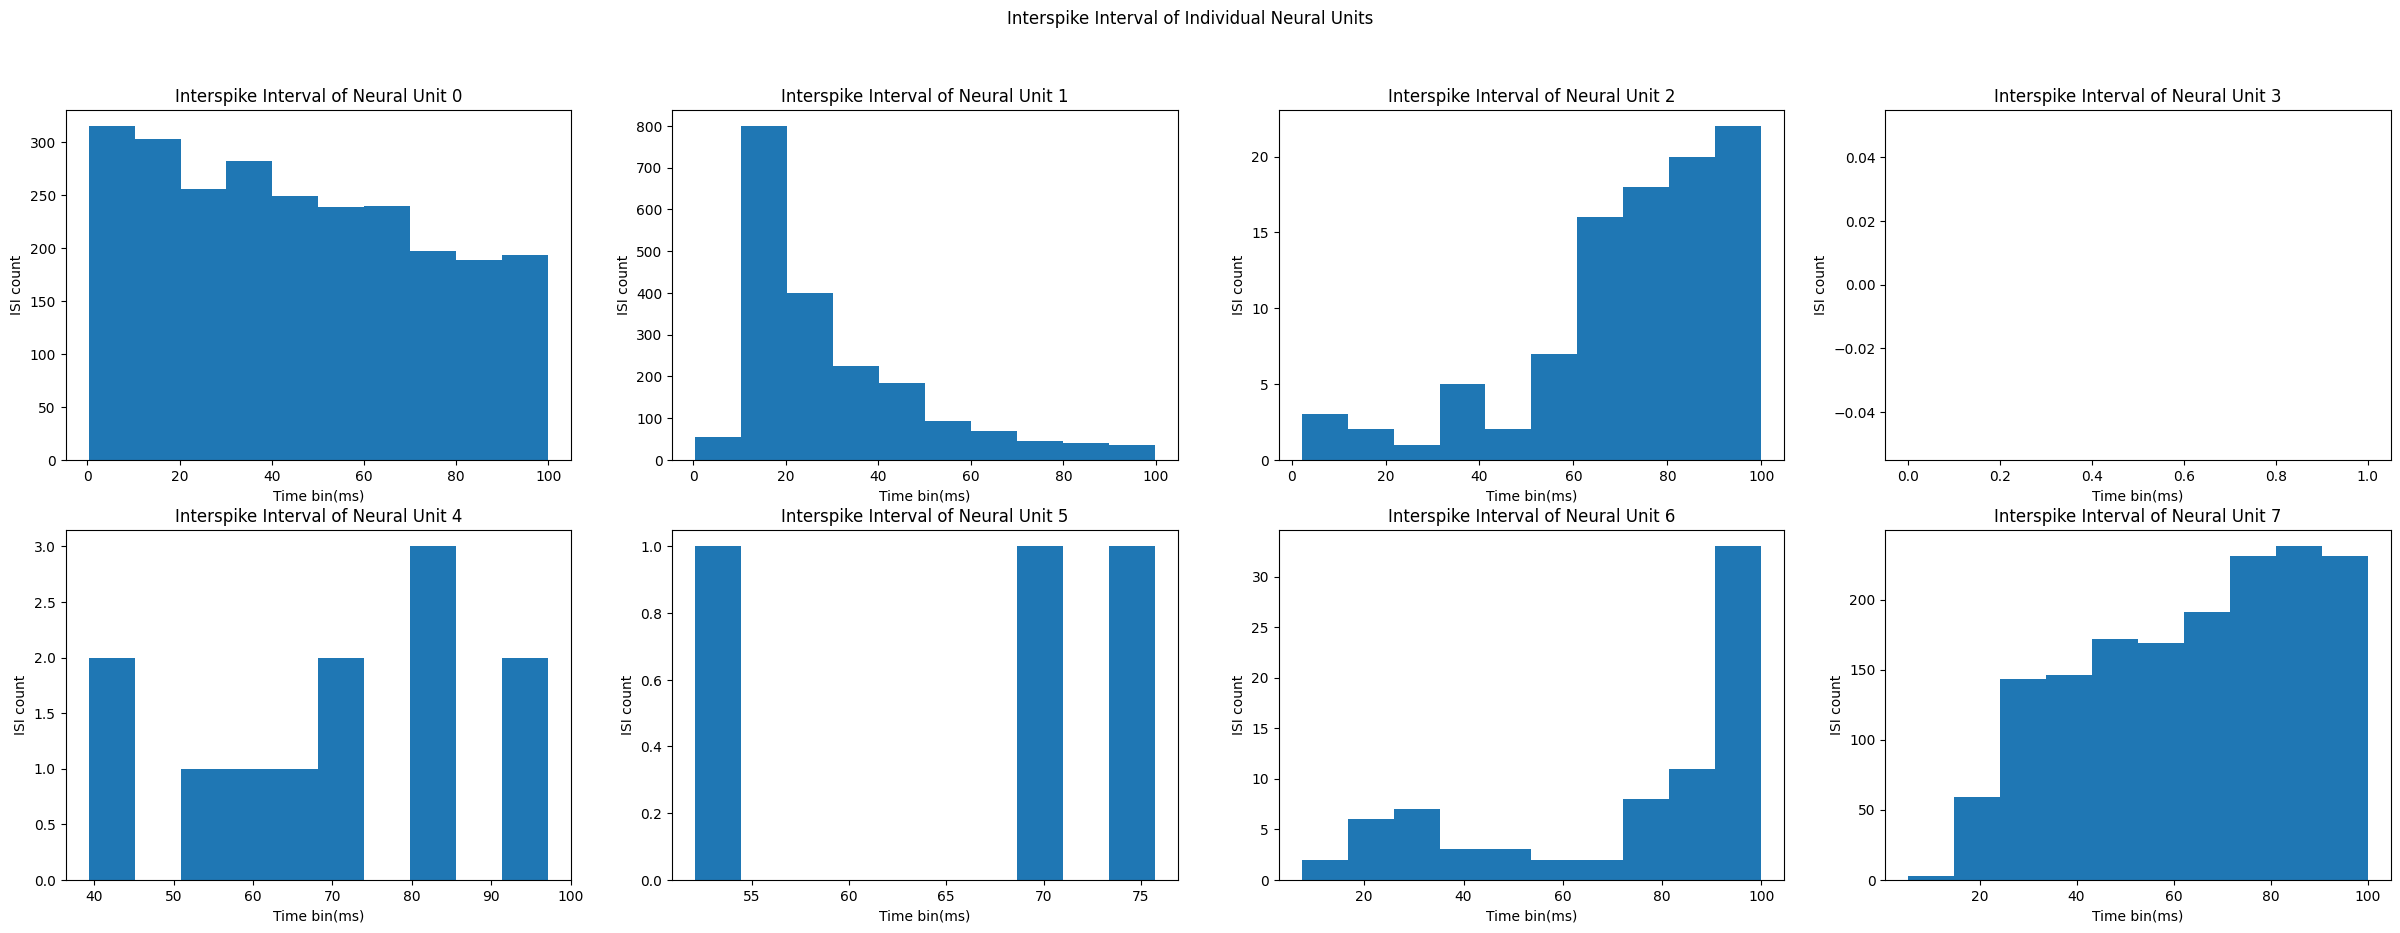

In [38]:
spike_data.plot_summary( sd )

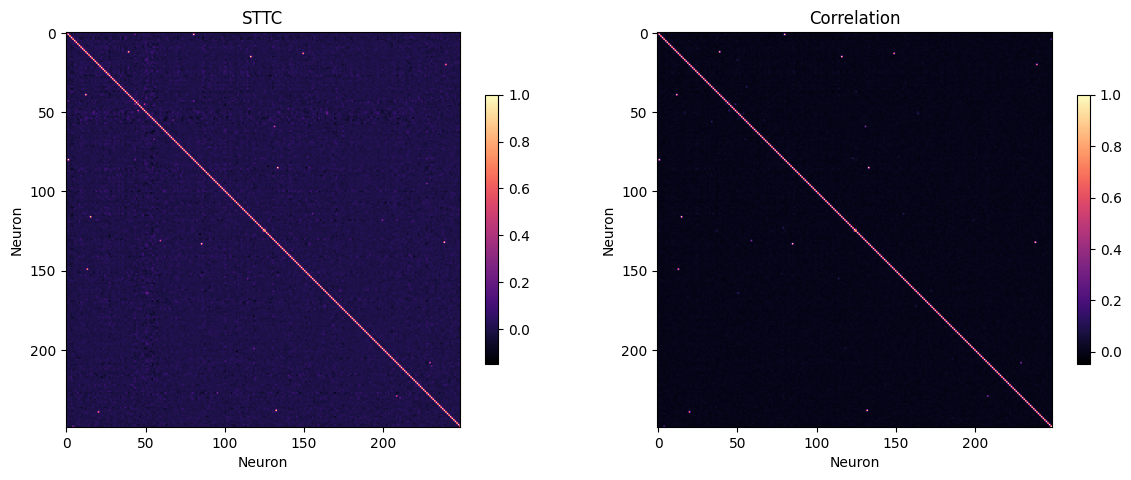

In [39]:
spike_data.plot_matrices_connectivity( sd )

calculating all latencies...
making plot


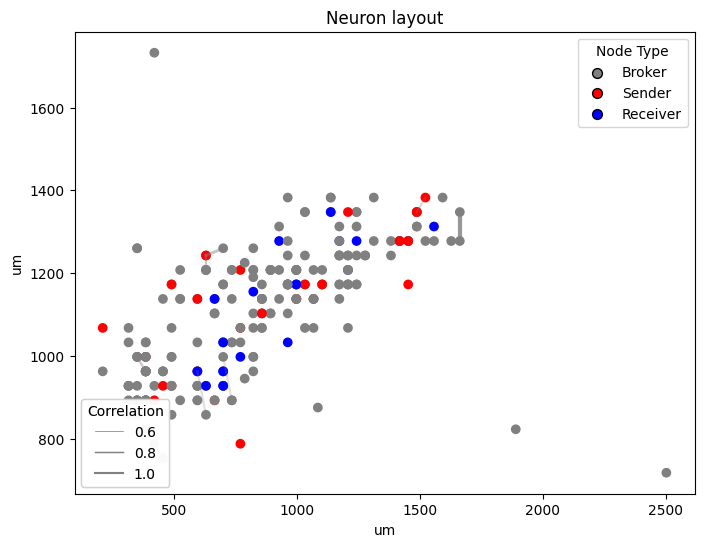

In [42]:
spike_data.plot_functional_connectivity_map(sd, sttc_threshold=0.2 )

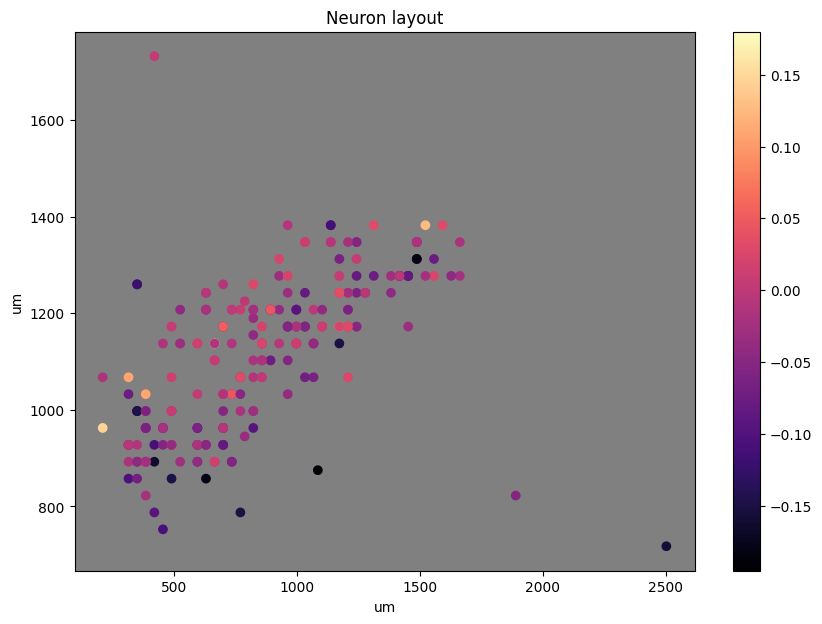

In [40]:
spike_data.plot_eigendecomposition_vector( sd )

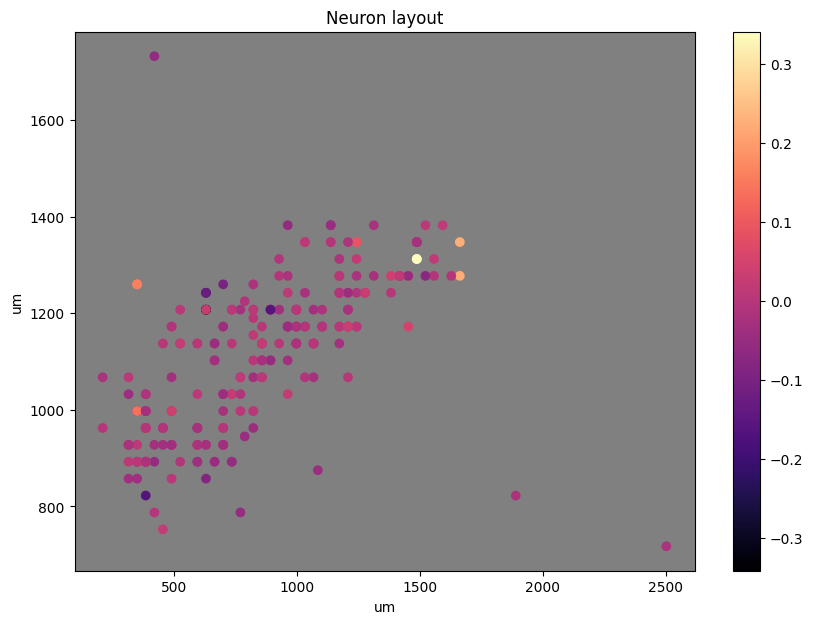

In [41]:
spike_data.plot_eigendecomposition_vector( sd, vector_index=1 )